### NLP 

    natural language processing 

    numerical data -> Model -> ? 

    Text -> numerical 

# 1. Get Data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('spam.csv', encoding='latin')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
data = pd.read_csv('spam.csv', encoding='latin')
data.drop([ 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [6]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 2. Preprocess Data 

    Data Imbalance Problem
    
        one category having 90% values other is only having 10 % values 
        
        SMOTE 

In [7]:
data['v1'].value_counts() 

ham     4825
spam     747
Name: v1, dtype: int64

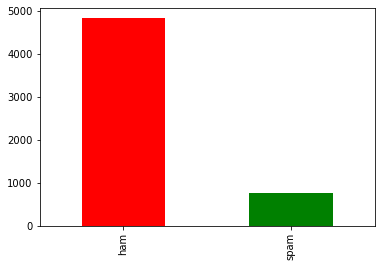

In [8]:
data['v1'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.show()

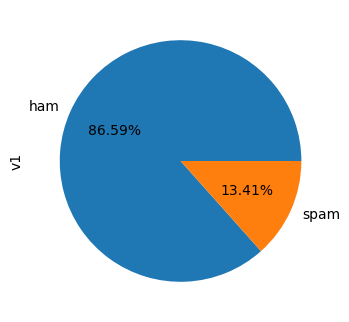

In [9]:
plt.figure(dpi=100)
((data['v1'].value_counts() / data.shape[0])*100).plot(kind='pie', autopct="%0.2f%%")
plt.show()

### NLP

    preprocessing of text 

In [10]:
import nltk 
import re

In [11]:
data.columns = [ 'label', 'message']

In [12]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
s = "hello !@$#%^&* how 1243 a$#re y(*&())ou"

In [14]:
expr = re.compile(r"[^0-9A-Za-z]")

re.sub(expr, '', s )

'hellohow1243areyou'

    case should be same -> lowercase
    
    puncatuation, spaces, newline characters -> remove 
    
    

In [15]:
data.dtypes

label      object
message    object
dtype: object

In [16]:
s = "hello      how    \t    are    you   "

expr = re.compile(r"\s+") # \s -> space class -> ' ', '\t', '\n'
# ' ', '    ' -> ' ', '\t\t     \t' -> ' '
re.sub(expr, ' ', s)

'hello how are you '

    Word Frequency Count 

    1 million -> % of stop words ? 40 % 
    
    60 % data 

In [17]:
stopwords = nltk.corpus.stopwords.words('english') + [ 'u', '2', ] # custom stopwords
# builtin stopwords

s = "hello i am doing nothing i will you will fine"

" ".join([ word for word in s.split() if word not in stopwords])



'hello nothing fine'

    Part of Speech

In [18]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

example_words = ["python","pythoner","pythoning","pythoned","pythonly"]

for w in example_words:
    print(ps.stem(w))

python
python
python
python
pythonli


In [19]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

def process_string(message):
    ps = PorterStemmer()
    message = message.lower()
    expr = re.compile(r'[^0-9A-Za-z]')
    message = re.sub(expr, ' ', message)
    message = re.sub(r"\s+", ' ', message)
    stopwords = nltk.corpus.stopwords.words('english') + [ 'u', '2', 'ur', '4', 'r'] # custom stopwords
    message = " ".join([ ps.stem(word) for word in message.split() if word not in stopwords])
    return message

In [20]:
data['message'] = data['message'].apply(process_string)

In [21]:
data.head()

,label,message
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif oni
2,spam,free entri wkli comp win fa cup final tkt 21st...
3,ham,dun say earli hor c alreadi say
4,ham,nah think goe usf live around though


In [22]:
data.groupby('label').count()

,message
label,
ham,4825
spam,747


In [23]:
wd = pd.Series(" ".join(data['message']).split())

    You can make a Word Frequency Table 

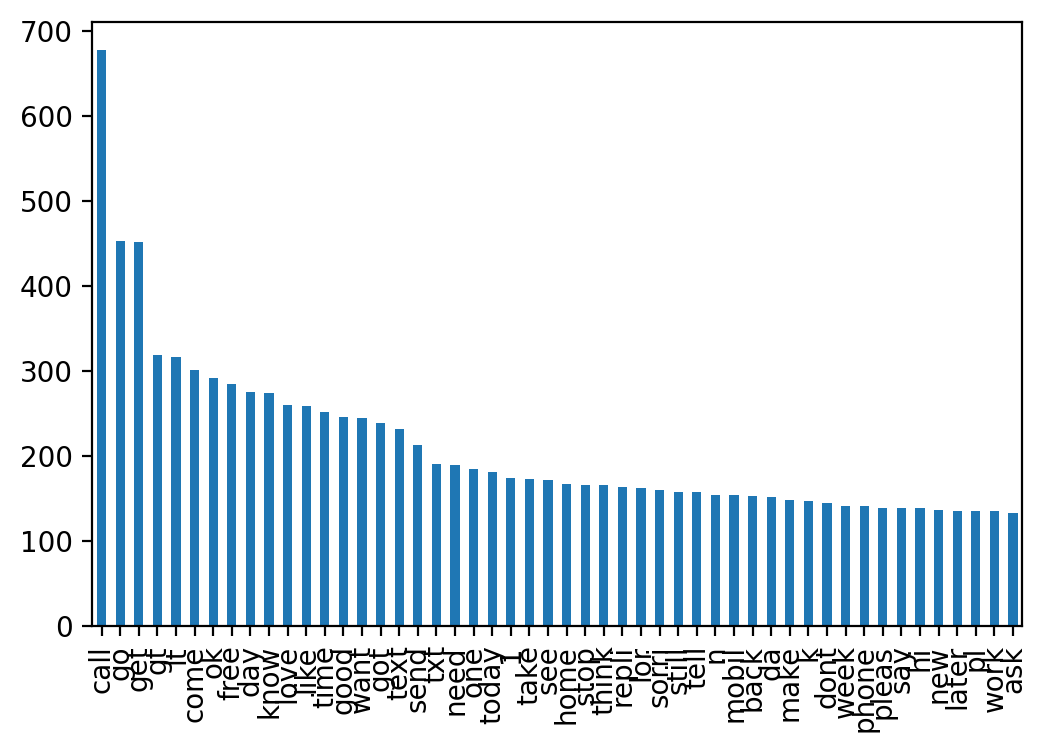

In [24]:
plt.figure(dpi=200)
wd.value_counts()[:50].plot(kind='bar')
plt.show()

#### To visualize Text Data we can draw a word colud

In [25]:
from wordcloud import WordCloud
def plot_img(img):
    plt.figure(dpi=200)
    plt.imshow(img)
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    

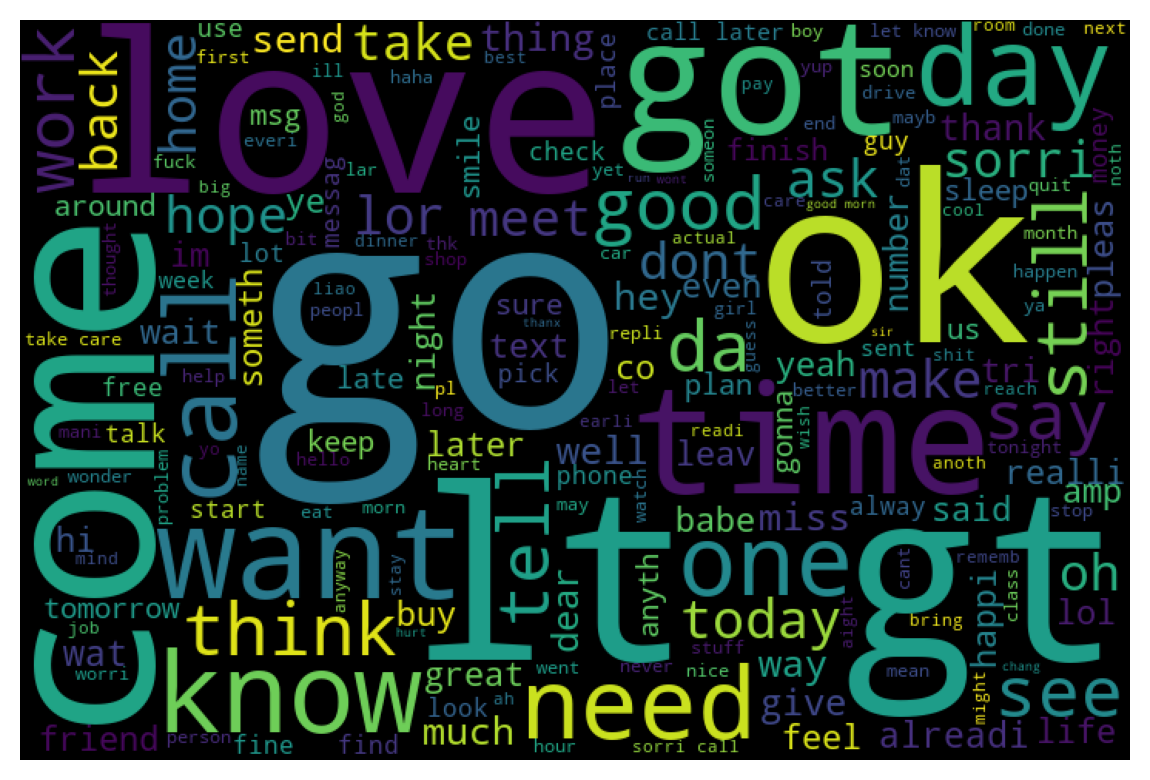

In [26]:
ham_messages = " ".join(data[data['label'] == 'ham']['message'])

ham_wordcloud = WordCloud(width=720, height=480).generate(ham_messages)
plot_img(ham_wordcloud)
#ham_messeges

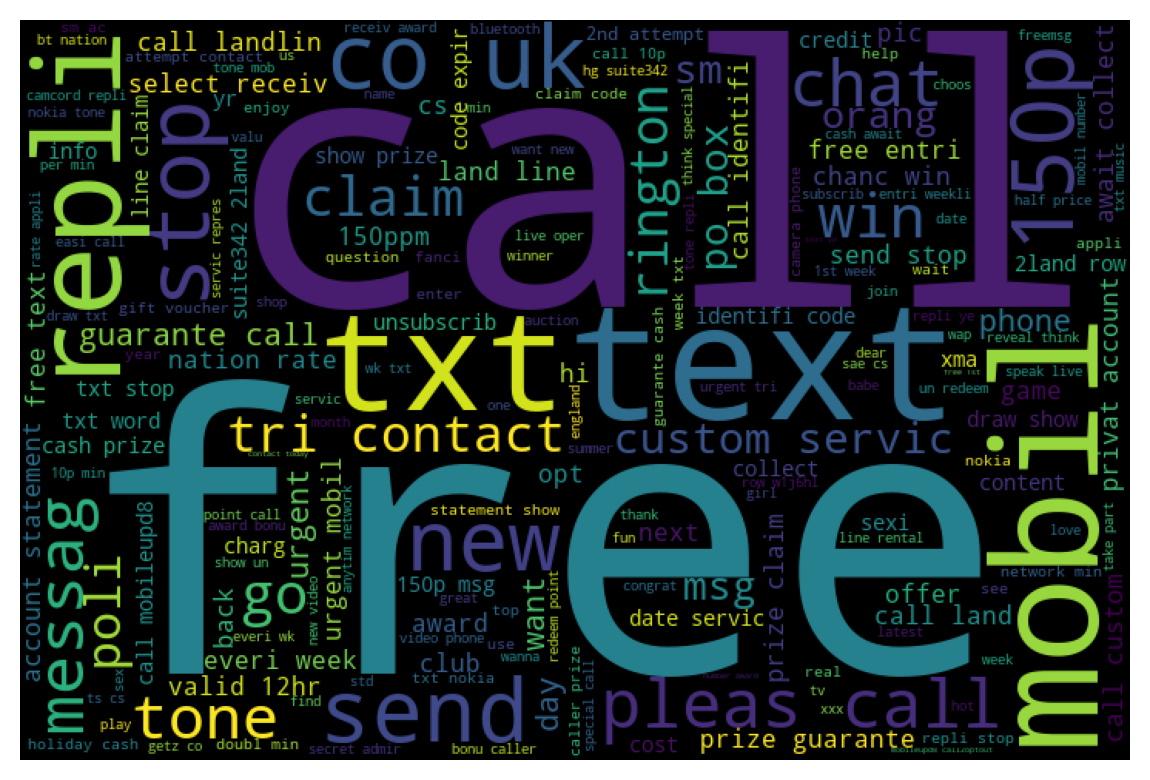

In [27]:
spam_messages = " ".join(data[data['label'] == 'spam']['message'])

spam_wordcloud = WordCloud(width=720, height=480).generate(spam_messages)
plot_img(spam_wordcloud)
#ham_messeges

#### SnowballStemmer

#### Convert text Into Vector 

    Create a vector of TF / IDF 

    Vocab -> All unique words in corpus 

    one hot encoding / Vectoraization

In [28]:
corpus = [
    'hello this is awesome',
    'hi hello good ',
    'hello is hello this this fine fine',
     'hello hello is fine',
     'hello world python awesome'
]

In [29]:
def gen_vocab(corpus):
    vocab = [ ]
    for string in corpus:
        for word in string.split():
            if word not in vocab:
                vocab.append(word)
    vocab.sort()
    return vocab

def create_vector(corpus):
    vocab = gen_vocab(corpus)
    #vocab_dict = { key:0 for key in vocab}
    print(vocab)
    vectors = []
    for string in corpus:
        words = string.split()
        vector = [ 0 ] * len(vocab)
        for word in words:
            if word in vocab:
                i = vocab.index(word)
                vector[i] += 1
                #vocab_dict[word] += 1
        vectors.append(vector)
    #print(vocab_dict)
    return vectors
        
output = create_vector(corpus)

['awesome', 'fine', 'good', 'hello', 'hi', 'is', 'python', 'this', 'world']


    1. 'hello this is awesome'    
    
    ['awesome', 'fine', 'good', 'hello', 'hi', 'is', 'python', 'this', 'world']
    
    [     1,       0,      0,      1,     0,     1,    0,        1,      0  ] 
    

In [30]:
output

[[1, 0, 0, 1, 0, 1, 0, 1, 0],
 [0, 0, 1, 1, 1, 0, 0, 0, 0],
 [0, 2, 0, 2, 0, 1, 0, 2, 0],
 [0, 1, 0, 2, 0, 1, 0, 0, 0],
 [1, 0, 0, 1, 0, 0, 1, 0, 1]]

TF -> Term Frequency of word in a sentence or messege 

IDF -> Inverse Document Frequency 

    inverse frequency of a word in whole document

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
corpus = [
    'hello this is awesome',
    'hi hello good ',
    'hello is hello this this fine fine',
     'hello hello is fine',
     'hello world python awesome'
]

In [33]:
vector = CountVectorizer()

In [34]:
vector.fit(corpus)

CountVectorizer()

In [35]:
# ['awesome', 'fine', 'good', 'hello', 'hi', 'is', 'python', 'this', 'world']
#     0,         1,     2,      3,      4,    5,      6,       7,      8
vector.vocabulary_

{'hello': 3,
 'this': 7,
 'is': 5,
 'awesome': 0,
 'hi': 4,
 'good': 2,
 'fine': 1,
 'world': 8,
 'python': 6}

In [36]:
tr_vector = vector.transform(corpus)

In [37]:
tr_vector.toarray()

array([[1, 0, 0, 1, 0, 1, 0, 1, 0],
       [0, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 2, 0, 2, 0, 1, 0, 2, 0],
       [0, 1, 0, 2, 0, 1, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 0, 1]], dtype=int64)

In [38]:
output

[[1, 0, 0, 1, 0, 1, 0, 1, 0],
 [0, 0, 1, 1, 1, 0, 0, 0, 0],
 [0, 2, 0, 2, 0, 1, 0, 2, 0],
 [0, 1, 0, 2, 0, 1, 0, 0, 0],
 [1, 0, 0, 1, 0, 0, 1, 0, 1]]

In [39]:
tf_idf = TfidfVectorizer()

In [40]:
tf_vector = tf_idf.fit_transform(corpus)

In [41]:
# ['awesome', 'fine', 'good', 'hello', 'hi', 'is', 'python', 'this', 'world']

In [42]:
tf_vector.toarray().round(2)

array([[0.57, 0.  , 0.  , 0.34, 0.  , 0.48, 0.  , 0.57, 0.  ],
       [0.  , 0.  , 0.67, 0.32, 0.67, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.63, 0.  , 0.37, 0.  , 0.26, 0.  , 0.63, 0.  ],
       [0.  , 0.57, 0.  , 0.67, 0.  , 0.47, 0.  , 0.  , 0.  ],
       [0.48, 0.  , 0.  , 0.28, 0.  , 0.  , 0.59, 0.  , 0.59]])

In [43]:
corpus

['hello this is awesome',
 'hi hello good ',
 'hello is hello this this fine fine',
 'hello hello is fine',
 'hello world python awesome']

#### Convert Text into Vectors

In [44]:
data.head()

,label,message
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif oni
2,spam,free entri wkli comp win fa cup final tkt 21st...
3,ham,dun say earli hor c alreadi say
4,ham,nah think goe usf live around though


In [52]:
data = pd.read_csv('spam.csv', encoding='latin')
data.drop([ 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
data.rename({'v1': 'label', 'v2': 'message'}, axis=1, inplace=True)
X = data[['message']]
X.head()

,message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."


In [54]:
data = pd.read_csv('spam.csv', encoding='latin')
data.drop([ 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
data.rename({'v1': 'label', 'v2': 'message'}, axis=1, inplace=True)
X = data[['message']]
X.head()
y = data['label']

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer()
X_tr = vector.fit_transform(X['message'])

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
tf_vector = TfidfVectorizer()

X_tr_tf = tf_vector.fit_transform(X['message'])

In [59]:
X_tr_tf

<5572x8672 sparse matrix of type '<class 'numpy.float64'>'
	with 73916 stored elements in Compressed Sparse Row format>

In [60]:
X_tr

<5572x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73916 stored elements in Compressed Sparse Row format>

In [61]:
X_tr.shape # numerical features
# we in total 7113 unique words

(5572, 8672)

#### PCA 

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_tr, y)
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_tr_tf, y)

In [79]:
from sklearn.svm import SVC

In [80]:
svm_clf = SVC()
svm_clf_tf = SVC()

In [86]:
svm_clf.fit(X_train, y_train)
svm_clf_tf.fit(X_train_tf, y_train_tf)

SVC()

In [87]:
y_hat = svm_clf.predict(X_test)
y_hat_tf = svm_clf_tf.predict(X_test_tf)

In [84]:
from sklearn.metrics import classification_report, confusion_matrix

In [88]:
print(confusion_matrix(y_test, y_hat))

[[1224    2]
 [  25  142]]


In [89]:
print(confusion_matrix(y_test_tf, y_hat_tf))

[[1212    2]
 [  31  148]]


In [53]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1203
        spam       0.99      0.89      0.94       190

    accuracy                           0.98      1393
   macro avg       0.99      0.95      0.97      1393
weighted avg       0.99      0.98      0.98      1393



In [90]:
print(classification_report(y_test_tf, y_hat_tf))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1214
        spam       0.99      0.83      0.90       179

    accuracy                           0.98      1393
   macro avg       0.98      0.91      0.94      1393
weighted avg       0.98      0.98      0.98      1393



#### Train diffrent model of classification

    SGDClassifier
    KNN Classifier
    RandomForeset Classifier
    Decision Tree Classifier
    Navie Bays Classifier
    
    SVC classifer 
    
#### hyper tune you SVM model or if possible other also to get best accuracy overall

In [92]:
X.head()

,message
0,go jurong point crazi avail bugi n great world...
1,ok lar joke wif oni
2,free entri wkli comp win fa cup final tkt 21st...
3,dun say earli hor c alreadi say
4,nah think goe usf live around though


In [97]:
# spam = 1, ham = 0
yn = (y == 'spam').astype(int)

In [98]:
y.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: label, dtype: object

In [99]:
yn.head()

0    0
1    0
2    1
3    0
4    0
Name: label, dtype: int32

In [11]:
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import warnings
from sklearn.naive_bayes import MultinomialNB
warnings.filterwarnings(action='ignore')
# text classification

class ProcessString(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.ps = PorterStemmer()
        self.lm = WordNetLemmatizer()
        self.stopwords = nltk.corpus.stopwords.words('english') + [ 'u', '2', 'ur', '4', 'r']
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X['message'] = X['message'].apply(self.process_data)
        return X['message']
    def process_data(self, message):
        message = message.lower()
        expr = re.compile(r'[^0-9A-Za-z]')
        message = re.sub(expr, ' ', message)
        message = re.sub(r"\s+", ' ', message)
        message = " ".join([ self.ps.stem(word) for word in message.split() if word not in self.stopwords])
        message =  " ".join([ self.lm.lemmatize(word) for word in message.split()])
        return message
    


data = pd.read_csv('spam.csv', encoding='latin')
data.drop([ 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
data.columns = [ 'label', 'message']
X = data[['message']]
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

pipeline = Pipeline([
    ('Process Strings', ProcessString()),
    ('Count Vectorizer', CountVectorizer()), # 
    ('naviy bays', MultinomialNB())
])


pipeline.fit(X_train, y_train)

y_hat_train = pipeline.predict(X_train) # 
y_hat_test  = pipeline.predict(X_test)

def evaluation_report(y, y_hat):
    print("Confusion Matrix: ")
    print(confusion_matrix(y, y_hat))
    print("Classifcation Report: ")
    print(classification_report(y, y_hat))
    
print("Training Report")
evaluation_report(y_train, y_hat_train)
print('\n\n', '_'*50)
print("Test Report")
evaluation_report(y_test, y_hat_test)
    

Training Report
Confusion Matrix: 
[[3825   18]
 [  16  598]]
Classifcation Report: 
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      3843
        spam       0.97      0.97      0.97       614

    accuracy                           0.99      4457
   macro avg       0.98      0.98      0.98      4457
weighted avg       0.99      0.99      0.99      4457



 __________________________________________________
Test Report
Confusion Matrix: 
[[982   0]
 [  9 124]]
Classifcation Report: 
              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       982
        spam       1.00      0.93      0.96       133

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [12]:
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import warnings
from sklearn.svm import SVC
warnings.filterwarnings(action='ignore')
# text classification

class ProcessString(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.ps = PorterStemmer()
        self.lm = WordNetLemmatizer()
        self.stopwords = nltk.corpus.stopwords.words('english') + [ 'u', '2', 'ur', '4', 'r']
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X['message'] = X['message'].apply(self.process_data)
        return X['message']
    def process_data(self, message):
        message = message.lower()
        expr = re.compile(r'[^0-9A-Za-z]')
        message = re.sub(expr, ' ', message)
        message = re.sub(r"\s+", ' ', message)
        message = " ".join([ self.ps.stem(word) for word in message.split() if word not in self.stopwords])
        message =  " ".join([ self.lm.lemmatize(word) for word in message.split()])
        return message
    


data = pd.read_csv('spam.csv', encoding='latin')
data.drop([ 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
data.columns = [ 'label', 'message']
X = data[['message']]
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

pipeline = Pipeline([
    ('Process Strings', ProcessString()),
    ('Count Vectorizer', CountVectorizer()), # 
    ('svm classifier', SVC())
])


pipeline.fit(X_train, y_train)

y_hat_train = pipeline.predict(X_train) # 
y_hat_test  = pipeline.predict(X_test)

def evaluation_report(y, y_hat):
    print("Confusion Matrix: ")
    print(confusion_matrix(y, y_hat))
    print("Classifcation Report: ")
    print(classification_report(y, y_hat))
    
print("Training Report")
evaluation_report(y_train, y_hat_train)
print('\n\n', '_'*50)
print("Test Report")
evaluation_report(y_test, y_hat_test)
    

Training Report
Confusion Matrix: 
[[3843    0]
 [  18  596]]
Classifcation Report: 
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      3843
        spam       1.00      0.97      0.99       614

    accuracy                           1.00      4457
   macro avg       1.00      0.99      0.99      4457
weighted avg       1.00      1.00      1.00      4457



 __________________________________________________
Test Report
Confusion Matrix: 
[[982   0]
 [ 17 116]]
Classifcation Report: 
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       982
        spam       1.00      0.87      0.93       133

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.99      0.98      0.98      1115



## Hyper parameter tunning

In [13]:
from sklearn.model_selection import GridSearchCV

In [21]:

pipeline = Pipeline([
    ('Process Strings', ProcessString()),
    ('Count Vectorizer', CountVectorizer()), # 
    
])

X_train_tr = pipeline.fit_transform(X_train)
parameter_grid = [{ 
        'C': [ 0.01, 0.1, 10, 100, 1000],
        'kernel': ["linear", "poly", "rbf", "sigmoid",]  },]
grid_search = GridSearchCV(SVC(), parameter_grid, cv=10, scoring='f1')

In [22]:
grid_search.fit(X_train_tr, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 10, 100, 1000],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}],
             scoring='f1')

In [23]:
grid_search.best_params_

{'C': 0.01, 'kernel': 'linear'}

### K-NN
    
    K nearest neighbour 
    
    Movie Recommandation Project

In [20]:
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import warnings
from sklearn.svm import SVC
warnings.filterwarnings(action='ignore')
# text classification

class ProcessString(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.ps = PorterStemmer()
        self.lm = WordNetLemmatizer()
        self.stopwords = nltk.corpus.stopwords.words('english') + [ 'u', '2', 'ur', '4', 'r']
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X['message'] = X['message'].apply(self.process_data)
        return X['message']
    def process_data(self, message):
        message = message.lower()
        expr = re.compile(r'[^0-9A-Za-z]')
        message = re.sub(expr, ' ', message)
        message = re.sub(r"\s+", ' ', message)
        message = " ".join([ self.ps.stem(word) for word in message.split() if word not in self.stopwords])
        message =  " ".join([ self.lm.lemmatize(word) for word in message.split()])
        return message
    


data = pd.read_csv('spam.csv', encoding='latin')
data.drop([ 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
data.columns = [ 'label', 'message']
X = data[['message']]
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

pipeline = Pipeline([
    ('Process Strings', ProcessString()),
    ('Count Vectorizer', CountVectorizer()), # 
    ('svm classifier', SVC(kernel='linear', C=0.01))
])


pipeline.fit(X_train, y_train)

y_hat_train = pipeline.predict(X_train) # 
y_hat_test  = pipeline.predict(X_test)

def evaluation_report(y, y_hat):
    print("Confusion Matrix: ")
    print(confusion_matrix(y, y_hat))
    print("Classifcation Report: ")
    print(classification_report(y, y_hat))
    
print("Training Report")
evaluation_report(y_train, y_hat_train)
print('\n\n', '_'*50)
print("Test Report")
evaluation_report(y_test, y_hat_test)
    

Training Report
Confusion Matrix: 
[[3842    1]
 [ 123  491]]
Classifcation Report: 
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      3843
        spam       1.00      0.80      0.89       614

    accuracy                           0.97      4457
   macro avg       0.98      0.90      0.94      4457
weighted avg       0.97      0.97      0.97      4457



 __________________________________________________
Test Report
Confusion Matrix: 
[[981   1]
 [ 33 100]]
Classifcation Report: 
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       982
        spam       0.99      0.75      0.85       133

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



#### Deploy this model in an tkinter application 

#### Flask website 

    Predict Wheater a Person will Survive on Titanic or Not

### KNN

    movie recommandation project

In [25]:
grid_search.best_estimator_.predict_proba(X_test)

AttributeError: predict_proba is not available when  probability=False

In [ ]:
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import warnings
from sklearn.svm import SVC
warnings.filterwarnings(action='ignore')
# text classification

class ProcessString(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.ps = PorterStemmer()
        self.lm = WordNetLemmatizer()
        self.stopwords = nltk.corpus.stopwords.words('english') + [ 'u', '2', 'ur', '4', 'r']
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X['message'] = X['message'].apply(self.process_data)
        return X['message']
    def process_data(self, message):
        message = message.lower()
        expr = re.compile(r'[^0-9A-Za-z]')
        message = re.sub(expr, ' ', message)
        message = re.sub(r"\s+", ' ', message)
        message = " ".join([ self.ps.stem(word) for word in message.split() if word not in self.stopwords])
        message =  " ".join([ self.lm.lemmatize(word) for word in message.split()])
        return message
    


data = pd.read_csv('spam.csv', encoding='latin')
data.drop([ 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
data.columns = [ 'label', 'message']
X = data[['message']]
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

pipeline = Pipeline([
    ('Process Strings', ProcessString()),
    ('Count Vectorizer', CountVectorizer()), # 
    ('svm classifier', SVC(kernel='linear', C=0.01))
])


pipeline.fit(X_train, y_train)

y_hat_train = pipeline.predict(X_train) # 
y_hat_test  = pipeline.predict(X_test)

def evaluation_report(y, y_hat):
    print("Confusion Matrix: ")
    print(confusion_matrix(y, y_hat))
    print("Classifcation Report: ")
    print(classification_report(y, y_hat))
    
print("Training Report")
evaluation_report(y_train, y_hat_train)
print('\n\n', '_'*50)
print("Test Report")
evaluation_report(y_test, y_hat_test)
    

### Select Best Estimator 

Fitting Model: SVM Classifier
Time Taken in Fitting:  5.26500000001397



Time Taken in Prediction:  0.8910000000032596

 ________________________________________________________________________________ 

Fitting Model: Navie Bays
Time Taken in Fitting:  0.0



Time Taken in Prediction:  0.01600000000325963

 ________________________________________________________________________________ 

Fitting Model: Random Forest
Time Taken in Fitting:  1.312000000005355



Time Taken in Prediction:  0.21899999998277053

 ________________________________________________________________________________ 

Fitting Model: K Nearest Neighbour
Time Taken in Fitting:  0.01600000000325963



Time Taken in Prediction:  0.875

 ________________________________________________________________________________ 

Fitting Model: SGD Classifier
Time Taken in Fitting:  0.015000000013969839



Time Taken in Prediction:  0.0

 ________________________________________________________________________________ 

      

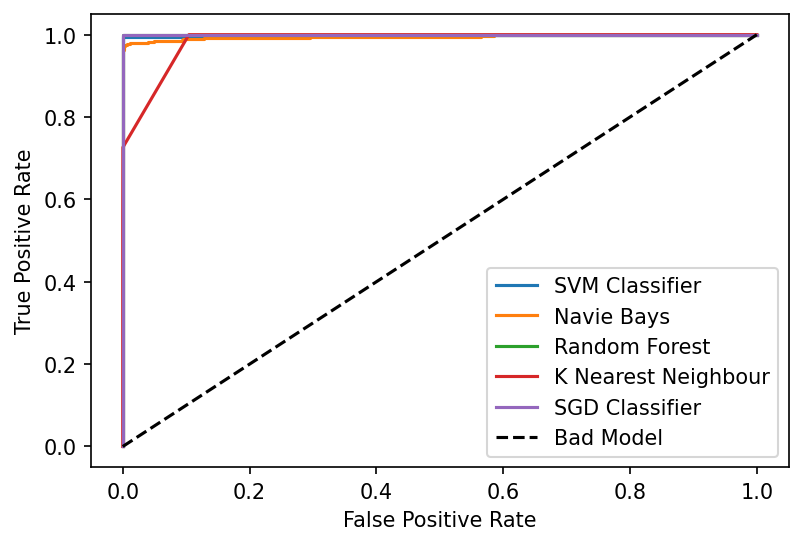

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import warnings

warnings.filterwarnings(action='ignore')
# text classification

# --------------------------Models to test----------------------------
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import time

class ProcessString(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.ps = PorterStemmer()
        self.lm = WordNetLemmatizer()
        self.stopwords = nltk.corpus.stopwords.words('english') + [ 'u', '2', 'ur', '4', 'r']
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X['message'] = X['message'].apply(self.process_data)
        return X['message']
    def process_data(self, message):
        message = message.lower()
        expr = re.compile(r'[^0-9A-Za-z]')
        message = re.sub(expr, ' ', message)
        message = re.sub(r"\s+", ' ', message)
        message = " ".join([ self.ps.stem(word) for word in message.split() if word not in self.stopwords])
        message =  " ".join([ self.lm.lemmatize(word) for word in message.split()])
        return message
    


data = pd.read_csv('spam.csv', encoding='latin')
data.drop([ 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
data.columns = [ 'label', 'message']
X = data[['message']]
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)





pipeline = Pipeline([
    ('Process Strings', ProcessString()),
    ('Count Vectorizer',  CountVectorizer()), 
    #('TF-IDF Vectorizer', TfidfTransformer()) # uncomment this and see what changes
    
])


X_train_tr = pipeline.fit_transform(X_train)
X_test_tr  = pipeline.transform(X_test) # always use only transform to transform test data 

models = [
    ("SVM Classifier", SVC(probability=True)),
    ("Navie Bays", MultinomialNB()),
    ("Random Forest", RandomForestClassifier()),
    ("K Nearest Neighbour", KNeighborsClassifier(n_neighbors=20)),
    ("SGD Classifier", SGDClassifier(loss='log')),
]

def train_models(models, X, y):
    for name, model in models:
        print(f"Fitting Model: {name}")
        st = time.monotonic()
        model.fit(X, y)
        et = time.monotonic()
        print("Time Taken in Fitting: ", et-st)
        
        print("\n\n")
        
        st = time.monotonic()
        y_hat = model.predict(X)
        et = time.monotonic()
        print("Time Taken in Prediction: ", et-st)
        print("\n", "_"*80, "\n")
    
def score_models(models, X, y):
    for name, model in models:
        
        y_hat = model.predict_proba(X)[:, 1]
        score = roc_auc_score(y, y_hat)
        print(f"{name:>30} Model's ROC AUC Score is {score:.2f}")
    
def plot_roc_curve(models, X, y):
    plt.figure(dpi=150)
    for name, model in models:
        y_hat = model.predict_proba(X)[:, 1]
        fpr, tpr, th = roc_curve(y, y_hat, pos_label='spam')
        plt.plot(fpr, tpr, label=name)
    plt.plot([0, 1], [0, 1], 'k--', label='Bad Model')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()
    
        
train_models(models, X_train_tr, y_train)
score_models(models, X_train_tr, y_train)
plot_roc_curve(models, X_train_tr, y_train)


### Above Result tells us that  `SGD, SVC and Random Forest` are good classifiers for this problem